In [1]:
import pandas as pd

conf = pd.read_csv('/Users/nate/Desktop/Conference Dashboard/Conference Data.csv')
print(conf.head(10))

          Id  Season  Week Season Type                Start Date  \
0  401549697    2023     1     regular  2023-08-31T22:00:00.000Z   
1  401558399    2023     1     regular  2023-08-31T23:00:00.000Z   
2  401550414    2023     1     regular  2023-09-01T00:00:00.000Z   
3  401544077    2023     1     regular  2023-09-02T04:00:00.000Z   
4  401550451    2023     1     regular  2023-09-02T18:00:00.000Z   
5  401554953    2023     1     regular  2023-09-02T18:00:00.000Z   
6  401547078    2023     1     regular  2023-09-02T23:00:00.000Z   
7  401549706    2023     2     regular  2023-09-09T16:00:00.000Z   
8  401544087    2023     2     regular  2023-09-09T20:00:00.000Z   
9  401550361    2023     2     regular  2023-09-09T22:00:00.000Z   

   Start Time Tbd  Completed  Neutral Site  Conference Game  Attendance  ...  \
0           False       True          True            False         NaN  ...   
1           False       True          True            False         NaN  ...   
2          

In [2]:
valid_conferences = ['ACC', 'Big 12', 'Big 10', 'SEC', 'PAC 12']

conf = conf[conf['Home Conference'].isin(valid_conferences)]
print(conf.head(10))

           Id  Season  Week Season Type                Start Date  \
22  401525461    2023     1     regular  2023-08-31T23:00:00.000Z   
23  401525463    2023     1     regular  2023-09-01T23:00:00.000Z   
24  401525462    2023     1     regular  2023-09-01T23:30:00.000Z   
25  401525464    2023     1     regular  2023-09-02T16:00:00.000Z   
26  401525465    2023     1     regular  2023-09-02T19:30:00.000Z   
27  401525466    2023     1     regular  2023-09-02T20:00:00.000Z   
28  401520167    2023     1     regular  2023-09-02T23:30:00.000Z   
29  401525467    2023     1     regular  2023-09-03T00:00:00.000Z   
30  401520182    2023     1     regular  2023-09-03T23:30:00.000Z   
31  401525468    2023     1     regular  2023-09-05T00:00:00.000Z   

    Start Time Tbd  Completed  Neutral Site  Conference Game  Attendance  ...  \
22           False       True         False            False     30028.0  ...   
23           False       True         False            False     49024.0  ... 

In [3]:
conf = conf[conf['Away Conference'].isin(valid_conferences)]
print(conf.head(10))

           Id  Season  Week Season Type                Start Date  \
24  401525462    2023     1     regular  2023-09-01T23:30:00.000Z   
28  401520167    2023     1     regular  2023-09-02T23:30:00.000Z   
30  401520182    2023     1     regular  2023-09-03T23:30:00.000Z   
31  401525468    2023     1     regular  2023-09-05T00:00:00.000Z   
33  401520216    2023     2     regular  2023-09-09T15:00:00.000Z   
41  401520201    2023     2     regular  2023-09-09T19:30:00.000Z   
44  401525496    2023     2     regular  2023-09-09T22:30:00.000Z   
47  401525500    2023     3     regular  2023-09-16T16:00:00.000Z   
52  401525505    2023     4     regular  2023-09-22T23:30:00.000Z   
54  401525507    2023     4     regular  2023-09-23T16:00:00.000Z   

    Start Time Tbd  Completed  Neutral Site  Conference Game  Attendance  ...  \
24           False       True          True             True         NaN  ...   
28           False       True          True            False     68723.0  ... 

In [4]:
# UPDATE WEEKLY

conf = conf[conf['Week'] < 4]
print(conf.head(10))

            Id  Season  Week Season Type                Start Date  \
24   401525462    2023     1     regular  2023-09-01T23:30:00.000Z   
28   401520167    2023     1     regular  2023-09-02T23:30:00.000Z   
30   401520182    2023     1     regular  2023-09-03T23:30:00.000Z   
31   401525468    2023     1     regular  2023-09-05T00:00:00.000Z   
33   401520216    2023     2     regular  2023-09-09T15:00:00.000Z   
41   401520201    2023     2     regular  2023-09-09T19:30:00.000Z   
44   401525496    2023     2     regular  2023-09-09T22:30:00.000Z   
47   401525500    2023     3     regular  2023-09-16T16:00:00.000Z   
316  401525503    2023     3     regular  2023-09-16T23:30:00.000Z   
317  401525836    2023     3     regular  2023-09-17T00:00:00.000Z   

     Start Time Tbd  Completed  Neutral Site  Conference Game  Attendance  \
24            False       True          True             True         NaN   
28            False       True          True            False     68723.0  

In [5]:
conference_wins = pd.DataFrame(columns=['Conference', 'Wins'])
conference_wins['Conference'] = ['ACC', 'Big 12', 'Big 10', 'SEC', 'PAC 12']
conference_wins['Wins'] = 0

In [6]:
conf['Home Points'] = conf['Home Points'].astype(int)
conf['Away Points'] = conf['Away Points'].astype(int)

In [7]:
for index, row in conf.iterrows():
    home_points = int(row['Home Points'])
    away_points = int(row['Away Points'])

    # Determine the winner based on points
    if home_points > away_points:
        winning_conference = row['Home Conference']
    elif home_points < away_points:
        winning_conference = row['Away Conference']
    else:
        # Handle ties (you can decide what to do in this case)
        winning_conference = None

    # Increment the win count for the winning conference
    if winning_conference is not None:
        conference_wins.loc[conference_wins['Conference'] == winning_conference, 'Wins'] += 1

# Display the total wins for each conference
print(conference_wins)

  Conference  Wins
0        ACC     7
1     Big 12     5
2     Big 10     0
3        SEC     6
4     PAC 12     0


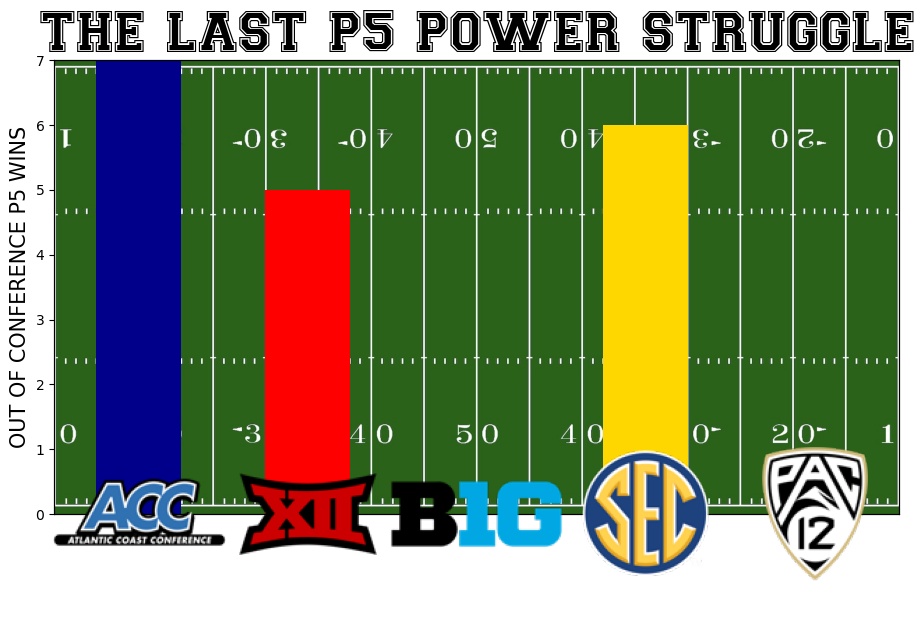

In [9]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
from PIL import Image

custom_font_path = '/Users/nate/Desktop/Conference Dashboard/CollegiateheavyoutlineMedium-B0yx.ttf'

# Custom Font
custom_font = FontProperties(fname=custom_font_path, size=40)
custom_font_y = FontProperties(size=15)

# Data Frame
conferences = conference_wins['Conference']
wins = conference_wins['Wins']

# Conference .pngs
image_paths = ['/Users/nate/Desktop/Conference Dashboard/ACC.png',
               '/Users/nate/Desktop/Conference Dashboard/BIG12.png',
               '/Users/nate/Desktop/Conference Dashboard/BIG10.png',
               '/Users/nate/Desktop/Conference Dashboard/SEC.png',
               '/Users/nate/Desktop/Conference Dashboard/PAC12.png']

# Field Image
football_field_image_path = '/Users/nate/Desktop/Conference Dashboard/field.jpg'
football_field = Image.open(football_field_image_path)

# Create figure with the football field as the background
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.imshow(football_field, aspect='auto', extent=[-0.5, len(conference_wins) - 0.5, 0, max(conference_wins['Wins'])])

# Bars
bar_colors = ['darkblue', 'red', 'teal', 'gold', 'black']
bar_width = 0.5

# Create a bar chart on top of the football field
conferences = conference_wins['Conference']
wins = conference_wins['Wins']
bars = ax1.bar(np.arange(len(conferences)), wins, color=bar_colors, width=bar_width)

# Second x-axis for images
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.xaxis.set_visible(False)

# PNG images as tick labels
for i, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    img = img.resize((int(img.width * 0.08), int(img.height * 0.08)))  # Adjust the zoom factor as needed
    imagebox = OffsetImage(img, zoom=1.0)
    ab = AnnotationBbox(imagebox, (i, 0), frameon=False, pad=0.0)
    ax2.add_artist(ab)

# Set labels/titles
ax1.set_ylabel('OUT OF CONFERENCE P5 WINS', fontproperties=custom_font_y)
ax1.set_title('THE LAST P5 POWER STRUGGLE', fontproperties=custom_font)

# Set x-axis tick positions and labels
ax1.set_xticks(np.arange(len(conferences)))
ax1.set_xticklabels([])

plt.tight_layout()
plt.show()
